# Introduction

This project focuses on a telecom company’s problem: predicting when customers will leave (churn) and understanding their behavior. Using techniques like classification, regression, and clustering, we analyze customer data to find insights. The aim is to understand customer traits and create actions based on data to improve business results.

The step-by-step machine learning process has three main parts:

* **Data Collection and Preprocessing:** The dataset was downloaded from Kaggle and loaded into a pandas DataFrame. Data cleaning included fixing missing values, changing data types, and removing outliers. Categorical columns were changed into numbers using label encoding and one-hot encoding. Numerical columns were scaled with StandardScaler so that all models used data on the same scale.

* **Exploratory Data Analysis (EDA):** The data was studied using different methods. Univariate and multivariate analysis was done. Plots like histograms, pie plot, bar chart, heatmap, and pair plots were used to find trends, relationships, and unusual data points. This helped in choosing which features to use for the models.

* **Model Development and Evaluation:** A Decision Tree Classifier was used to predict if a customer would churn. GridSearchCV was used to tune the model. The model was checked using accuracy, F1-score, and ROC-AUC.
An XGBoost Regressor was used to predict MonthlyCharges using customer and service features. R-squared and Mean Squared Error were used to check the model.
K-Means Clustering was used to group customers. The elbow method was used to pick k=2. Silhouette and Davies-Bouldin scores were used to check the clusters.


**Dataset Overview**

The dataset for this project is the “Telco Customer Churn” dataset from Kaggle. It has details of 7,043 telecom customers, including their personal info, service usage, account details, and whether they left the service.

# Business Problem

The Telco Customer Churn dataset has information about a telecom company’s customers. It includes details like age, gender, services used, contract type, and if the customer has left the company. Reducing churn is important because keeping current customers costs less than getting new ones.

This project tries to solve three main business problems using predictive analytics:

* Churn Prediction: A Decision Tree Classifier is used to find customers who are likely to leave. The company can use this to focus on these customers and try to keep them.
* Billing Estimation: XGBoost Regressor is used to predict MonthlyCharges. This helps the company estimate future.
* Customer Segmentation: K-Means Clustering is used to group customers based on their behavior. This helps the company make different plans and offers for different groups of customers.
  
By using these models, the telecom company can learn more about customer behavior, try to reduce the number of customers leaving, and plan for steady revenue using data-based decisions.

# Data Collection and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Top 5 observations
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Display basic information about the dataset
print("\nData Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nul

In [5]:
# Data Cleaning
# Convert 'TotalCharges' to numeric, replacing invalid entries with NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [6]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
# Investigating the missing values
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Customers with TotalCharges as NaN is has zero tenure. This could be because they have not charged the customer yet. Need to investigate if the MonthlyCharges and total charges for a customer with tenure 1 is the same.

In [8]:
# Further checking whether MonthlyCharges for the customers with tenure==1 is same as the TotalCharges
data[(data['tenure']==1) & (data['MonthlyCharges']!=data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [9]:
# Assuming the TotalCharges for customers with tenure 0 is the same as MonthlyCharges
# Fill missing values of TotalCharges with MonthlyCharges
data.loc[(data['tenure']==0) & (data['TotalCharges'].isnull()), 'TotalCharges'] = data['MonthlyCharges']

In [10]:
# Check for duplicates
print("\nNumber of duplicate rows:", data.duplicated().sum())


Number of duplicate rows: 0


In [11]:
# Create a copy and drop 'customerID' as it's not useful for modeling
df = data.drop(columns=['customerID'])

In [12]:
# List categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)


Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
# Summary Statistics
numerical_features = df[['tenure', 'MonthlyCharges', 'TotalCharges']].columns.tolist()
print("\nNumerical Features Summary:")
print(df[numerical_features].describe())


Numerical Features Summary:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.798992
std      24.559481       30.090047   2266.730170
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


# Exploratory Data Analysis (EDA)
Exploratory Data Analysis was used to understand the data and see how features are distributed and related.

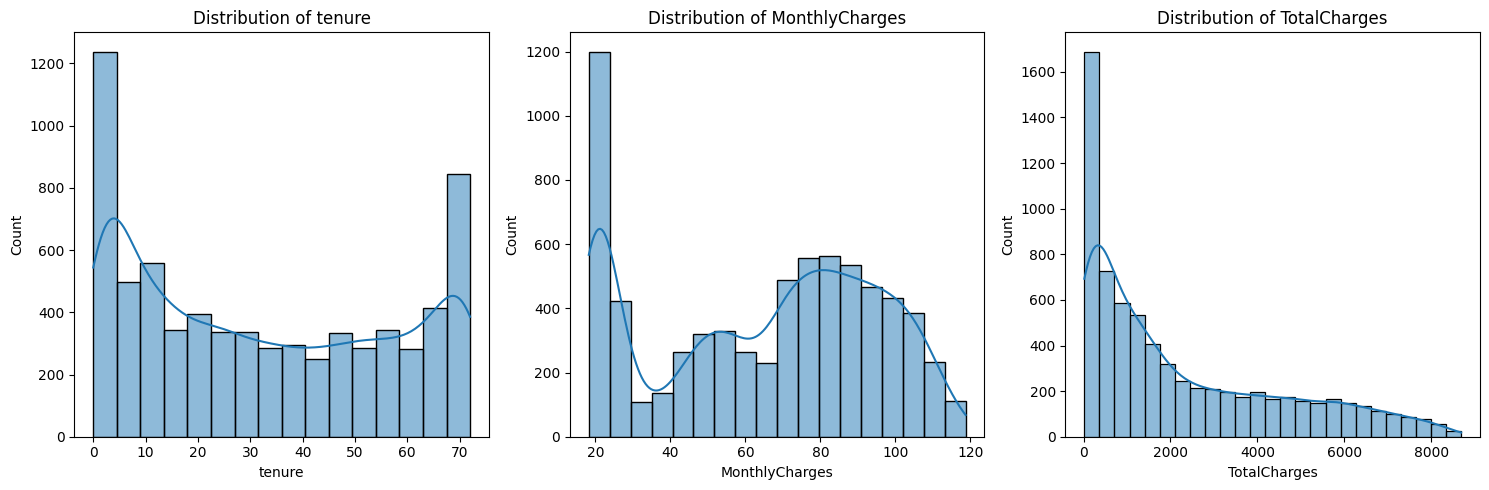

In [14]:
# Histogram for numerical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[['tenure', 'MonthlyCharges', 'TotalCharges'][i]], kde=True )
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

* Tenure: Most customers stayed for a short time, mainly between 0 and 5 months. There was also a group that stayed around 70 months.
* MonthlyCharges: There were two main groups, one paying around $20–40 and another around $80–100. This shows there are different types of service plans.
* TotalCharges: Most values were low, but a few customers had very high charges. These high values were from customers with long tenure or costly services.


In [15]:
# Handle Outliers in TotalCharges
# Drop outliers from 'TotalCharges' using the IQR method
lower = df['TotalCharges'].quantile(0.01)
upper = df['TotalCharges'].quantile(0.99)

# Keep only rows within bounds
df = df[(df['TotalCharges'] >= lower) & (df['TotalCharges'] <= upper)]

Outlier treatment: Values in TotalCharges below the 1st percentile or above the 99th percentile was removed to avoid issues in models like XGBoost Regressor.

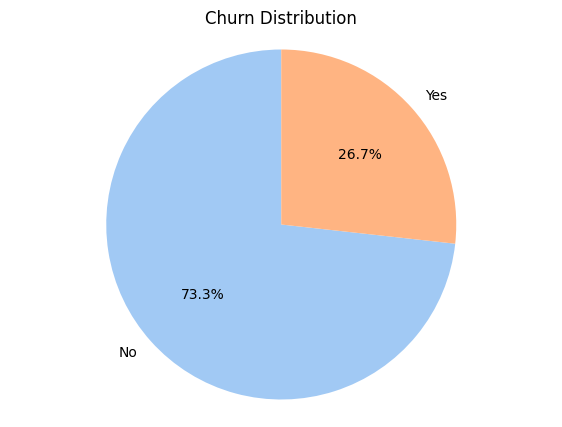

In [16]:
# Pie Chart for churn distribution
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(7, 5))
plt.pie(churn_counts,
        labels=churn_counts.index, # Use 'No' and 'Yes' as labels
        autopct='%1.1f%%',         # Show percentages on slices
        startangle=90,             # Start the first slice at 90 degrees (top)
        colors=sns.color_palette('pastel'))
plt.title('Churn Distribution')
plt.axis('equal') # Ensures the pie chart is circular.
plt.show()

About 26.7% of customers left, and 73.3% stayed. This means the data is imbalanced, which affects how models are chosen and how results are measured.

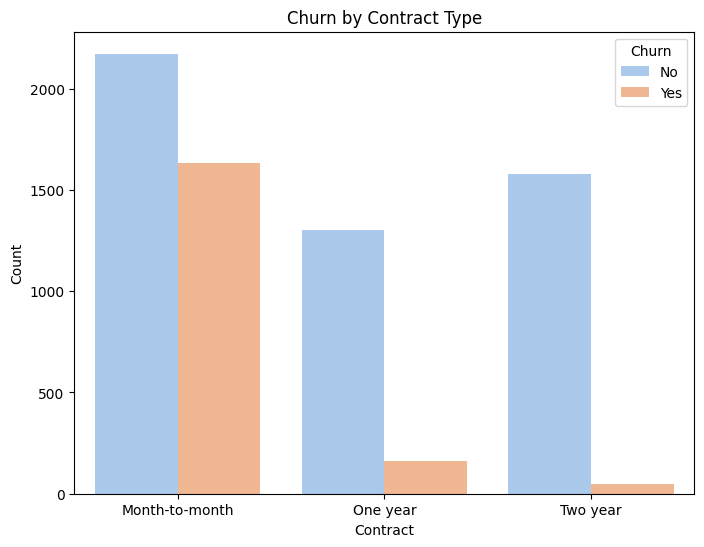

In [17]:
# Churn rate by Contract type
# Define the desired order for the 'Contract' categories
desired_contract_order = ['Month-to-month', 'One year', 'Two year']

plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', palette='pastel', data=df, order=desired_contract_order)
plt.title('Churn by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

Churn was highest for month-to-month contracts (about 43%). One-year contracts had about 14% churn, and two-year contracts had about 3% churn. Longer contracts mean fewer people leave.

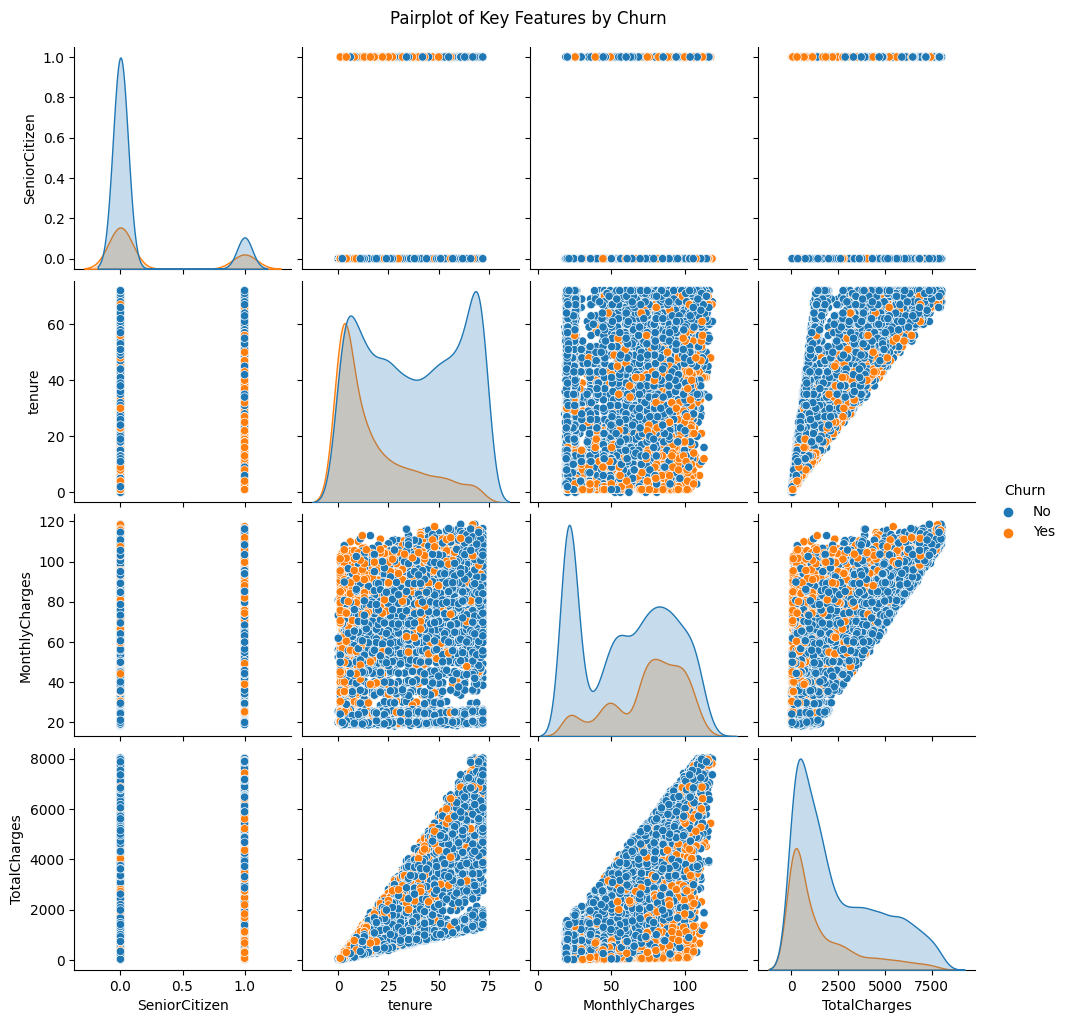

In [18]:
# Scatterplot Matrix
g = sns.pairplot(df, hue='Churn')
g.fig.suptitle('Pairplot of Key Features by Churn', y=1.02)
plt.show()

* SeniorCitizen: Churn was a bit higher among seniors.
* Tenure: New customers left more often.
* MonthlyCharges: Customers with high charges left more.
* TotalCharges: Low TotalCharges meant higher churn, likely because these customers were new.


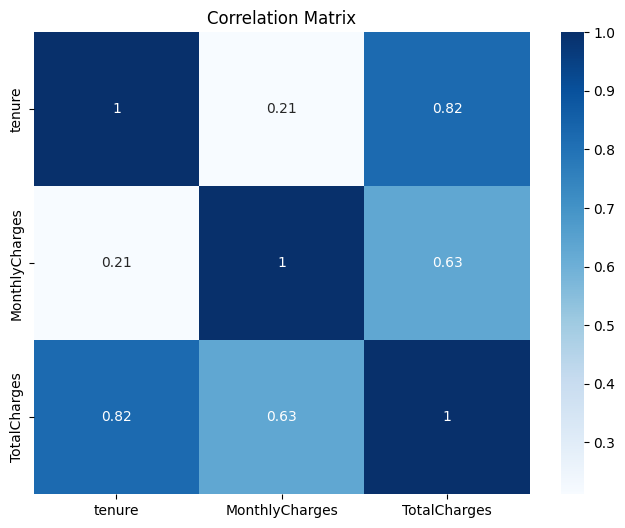

In [19]:
# Correlation matrix for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

* Tenure and TotalCharges had a strong relationship (0.83).
* MonthlyCharges and TotalCharges had a moderate relationship (0.65).
* Tenure and MonthlyCharges had a weak relationship (0.25).

# Model Development and Evaluation

This task uses three machine learning models to answer three business questions: predicting churn, estimating monthly bills, and grouping customers.

# Model 1: Decision Tree Classifier

This model aims to predict if a telecom customer will leave (churn) or stay.

**Data Preparation:**

Categorical columns were changed to numbers using pd.get_dummies() for features with many categories. The target column Churn was encoded as 0 for No and 1 for Yes using LabelEncoder. For numerical features like tenure, MonthlyCharges, and TotalCharges, StandardScaler was used to bring all values to a similar scale. The data was split with 80% for training and 20% for testing using train_test_split(). This helps prevent data leakage and checks if the model works on new data.

In [20]:
# Decision Tree Classifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, auc, roc_curve

In [21]:
# Data for Decision Tree Classifier
df_dt = df.copy()

In [22]:
# Encode categorical variables
categorical_cols.remove('Churn')  # Exclude target
df_dt = pd.get_dummies(df_dt, columns=categorical_cols, drop_first=True)
le = LabelEncoder()
df_dt['Churn'] = le.fit_transform(df_dt['Churn'])  # Yes=1, No=0

In [23]:
# train_test_split data
X = df_dt.drop('Churn', axis=1)
y = df_dt['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Scale numerical features
scaler_dt = StandardScaler()
X_train[numerical_features] = scaler_dt.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler_dt.transform(X_test[numerical_features])

In [25]:
# GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [26]:
# Best model
best_dt = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [27]:
# Evaluate model
dt_y_pred = best_dt.predict(X_test)
dt_y_prob = best_dt.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, dt_y_pred)
f1 = f1_score(y_test, dt_y_pred)
roc_auc = roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1])

print("Decision Tree Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Decision Tree Results:
Accuracy: 0.8096
F1-Score: 0.6183
ROC-AUC: 0.8356


The F1 Score shows the model handles both precision and recall well, which is important for imbalanced data. The ROC-AUC Score shows the model can separate churn and non-churn customers.

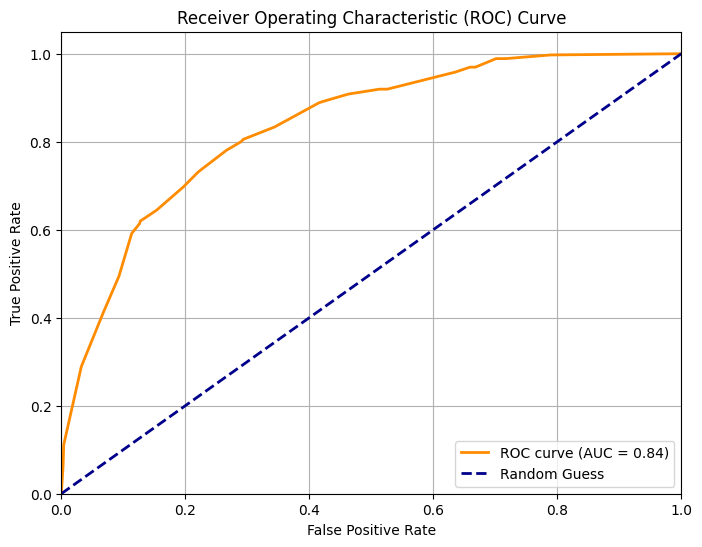

In [28]:
# Visualize ROC Curve
# Compute ROC curve and ROC area
dt_y_prob = best_dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, dt_y_prob)
roc_auc = auc(fpr, tpr)

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The ROC curve shows the model works better than random guessing, with an area under the curve of 0.84.

# Model 2: XGBoost Regressor

The goal is to predict MonthlyCharges for each customer using their account and service details. This helps the company see how much different customer groups pay and plan costs.

**Data Preparation:**

All categorical features were changed to numbers using one-hot encoding. MonthlyCharges was set as the target variable. The remaining numerical features like tenure and TotalCharges were scaled using StandardScaler. The data was divided into training and test sets exactly as done for the first model, 80% for training and 20% for testing using train_test_split().

In [29]:
# XGBoost Regressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [30]:
# Data for XGBoost Regressor
df_xgb = df.copy()

In [31]:
# Encode categorical variables
categorical_cols = df_xgb.select_dtypes(include=['object']).columns.tolist()
df_xgb = pd.get_dummies(df_xgb, columns=categorical_cols, drop_first=True)

In [32]:
# train_test_split data
X = df_xgb.drop(['MonthlyCharges'], axis=1)
y = df_xgb['MonthlyCharges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Scale numerical features
numerical_cols = ['tenure', 'TotalCharges']
scaler_xgb = StandardScaler()
X_train[numerical_cols] = scaler_xgb.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler_xgb.transform(X_test[numerical_cols])

In [34]:
# GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'reg_lambda': [0, 1, 10],
    'reg_alpha': [0, 1, 10]
}
xgb_model = xgb.XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'reg_alpha': [0, 1, 10], 'reg_lambda': [0, 1, 10]},
             scoring='r2')

In [35]:
# Best model
best_xgb = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 0}


In [36]:
# Evaluate model
xgb_y_pred = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, xgb_y_pred)
r2 = r2_score(y_test, xgb_y_pred)

print("XGBoost Regressor Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

XGBoost Regressor Results:
Mean Squared Error: 1.1850
R² Score: 0.9986


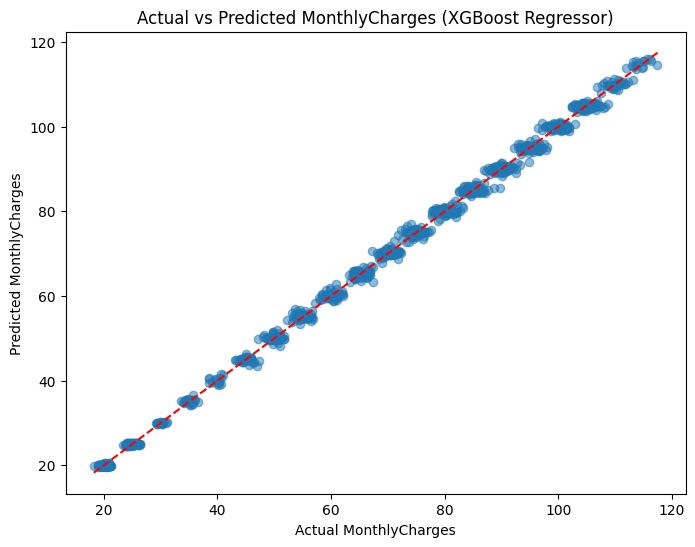

In [37]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual MonthlyCharges')
plt.ylabel('Predicted MonthlyCharges')
plt.title('Actual vs Predicted MonthlyCharges (XGBoost Regressor)')
plt.show()

The model shows a high R² score, meaning it predicts MonthlyCharges very accurately. However, this could be because the model is overfitting. Overfitting happens when the model learns patterns too specifically from the training data instead of generalizing well. In this case, MonthlyCharges is indirectly linked to TotalCharges and tenure. So, the model may just be using this relationship instead of learning meaningful patterns from other features. We need to check if the model works well on new, unseen data to confirm if it's truly overfitting.

The bimodal nature of MonthlyCharges (due to fixed service plans) reduces true variance, making the regression task easier—but also more prone to overfitting. Also, since the dataset is designed primarily for churn classification, using it for regression introduces risk. The XGBoost model fits the existing patterns too well, but may fail to generalize on unseen data or new service plans.

This outcome underlines the need to carefully evaluate target-feature dependencies to avoid spurious performance caused by implicit formulaic links.

# Model 3: K-Means Clustering

To find hidden groups of customers in the Telco Churn dataset, K-Means clustering was used. This method groups similar records when there are no labels.

**Categorical Encoding:**

The dataset had features like Contract, InternetService, and PaymentMethod, which are not numbers. These were converted to numbers using one-hot encoding (drop_first=True to avoid extra columns). The Churn column was changed to 0 for No and 1 for Yes using LabelEncoder. This step shows how to handle categorical data for machine learning.

In [38]:
# K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [39]:
# Data for K-Means Clustering
df_km = df.copy()

In [40]:
# Encode categorical variables
categorical_cols = df_km.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')
df_km = pd.get_dummies(df_km, columns=categorical_cols, drop_first=True)
le = LabelEncoder()
df_km['Churn'] = le.fit_transform(df_km['Churn'])

In [41]:
# Scale all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_km.drop('Churn', axis=1))

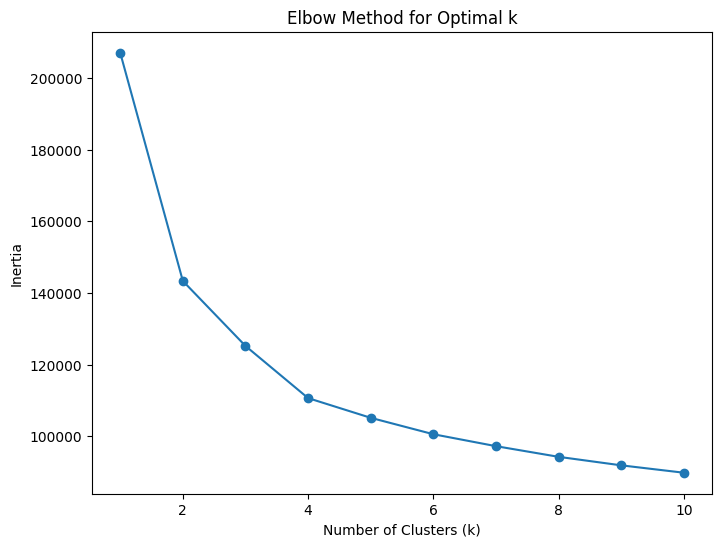

In [42]:
# Elbow method to find optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

The plot showed a clear bend at k=2, so two clusters were chosen.

In [43]:
# Apply K-Means with k=2 (based on elbow method)
kmeans = KMeans(n_clusters=2, random_state=42)
df_km['Cluster'] = kmeans.fit_predict(X_scaled)

**Dimensionality Reduction with PCA for Visualization:**

Principal Component Analysis (PCA) was used to reduce the data to two main components for plotting. A scatterplot showed two groups, each with a different color, making it easy to see the clusters.

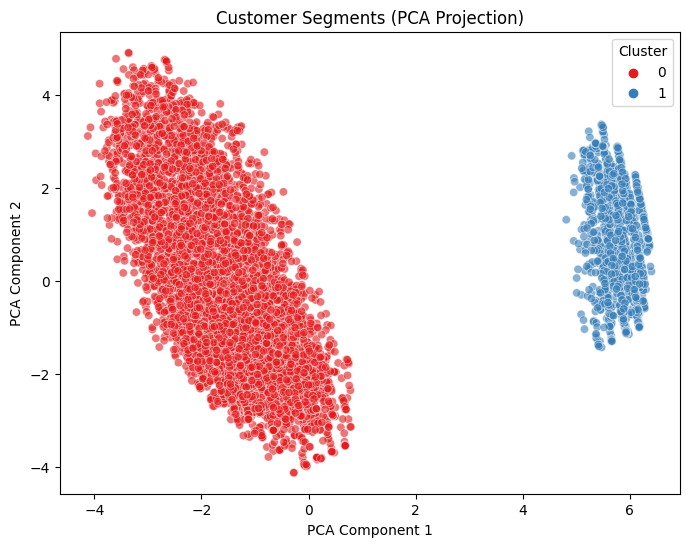

In [44]:
# Visualize clusters using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_km['Cluster'], palette='Set1', alpha=0.6)
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [45]:
# Evaluate clustering
sil_score = silhouette_score(X_scaled, df_km['Cluster'])
db_score = davies_bouldin_score(X_pca, df_km['Cluster'])
print(f"K-Means Silhouette Score (k=2): {sil_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")

K-Means Silhouette Score (k=2): 0.3365
Davies-Bouldin Score: 0.4112



Churn Rate by Cluster:
Cluster
0    0.321888
1    0.063918
Name: Churn, dtype: float64


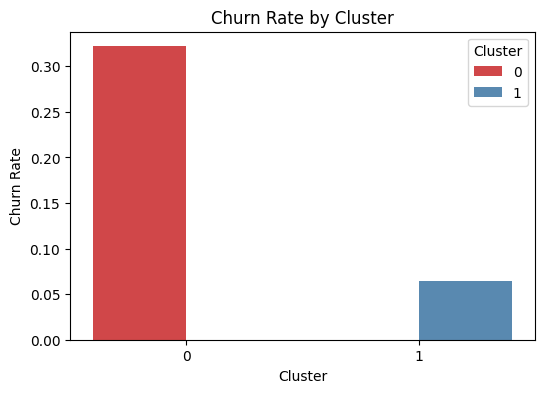

In [46]:
# Analyze churn rate by cluster
cluster_churn = df_km.groupby('Cluster')['Churn'].mean()
print("\nChurn Rate by Cluster:")
print(cluster_churn)

plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_churn.index, y=cluster_churn.values, hue=cluster_churn.index, palette='Set1', alpha=0.9)
plt.title('Churn Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.show()

The churn rate was found for each cluster:

* Cluster 1: churn rate about 6.4% (loyal customers)
* Cluster 0: churn rate about 32.2% (at-risk customers)
  
This helps us understand the company should focus on Cluster 0 for retention.

# Conclusion

This project used predictive analytics and machine learning to solve the problem of customer churn in the telecom industry. The Telco Customer Churn dataset was used to try different methods like classification, regression, and clustering to understand customer behavior, billing, and risk groups.

The Decision Tree classifier was used to find customers who might leave. It gave an F1-score of 0.6183 and a ROC-AUC of 0.8356. These results show the model worked well with imbalanced data and pointed out important factors like contract type, tenure, and service use.

The XGBoost Regressor was used to predict MonthlyCharges. It gave a very high R² score of 0.9986, but this was likely because of data leakage and strong links between features, not because the model can always predict well. This shows the need for careful checking and understanding of the data.

K-Means clustering was used to group customers. It found two main segments with different churn rates. These groups can help the company profile customers and plan better marketing.

This project met the goals of understanding and preparing different data types, using the right machine learning models for each problem, and carrying out a full project from data cleaning to business use. Steps like EDA, model tuning, checking results, and visualizing data made the results clear and useful.

For business, these findings can help the telecom company make better plans to keep customers, set prices, and group users. With these models, the company can spot risks early, offer personal plans, and reduce churn, turning data into useful actions for better profits.